<a href="https://colab.research.google.com/github/1997MarsRover/Small-LMs/blob/main/transformers/Self_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 12.1: Self Attention**

This notebook builds a self-attention mechanism from scratch, as discussed in Understanding Deep Learning by Prof. Simone Prince




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The self-attention mechanism maps $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ and returns $N$ outputs $\mathbf{x}'_{n}\in \mathbb{R}^{D}$.  



In [ ]:
# Set seed so we get the same random numbers
np.random.seed(3)
# Number of inputs
N = 3
# Number of dimensions of each input
D = 4
# Create an empty list
all_x = []
# Create elements x_n and append to list
for n in range(N):
  all_x.append(np.random.normal(size=(D,1)))
# Print out the list
print(all_x)


[array([[ 1.78862847],
       [ 0.43650985],
       [ 0.09649747],
       [-1.8634927 ]]), array([[-0.2773882 ],
       [-0.35475898],
       [-0.08274148],
       [-0.62700068]]), array([[-0.04381817],
       [-0.47721803],
       [-1.31386475],
       [ 0.88462238]])]


We'll also need the weights and biases for the keys, queries, and values qn = βq + Ωqxn
km = βk + Ωkxm,



In [ ]:
# Set seed so we get the same random numbers
np.random.seed(0)

# Choose random values for the parameters
omega_q = np.random.normal(size=(D,D))
omega_k = np.random.normal(size=(D,D))
omega_v = np.random.normal(size=(D,D))
beta_q = np.random.normal(size=(D,1))
beta_k = np.random.normal(size=(D,1))
beta_v = np.random.normal(size=(D,1))

Now let's compute the queries, keys, and values for each input

In [ ]:
# Make three lists to store queries, keys, and values
all_queries = []
all_keys = []
all_values = []
# For every input
for x in all_x:
  #V[X] = βv1T + ΩvX

  query = beta_q + np.matmul(omega_q, x)
  key = beta_k + np.matmul(omega_k, x)
  value = beta_v + np.matmul(omega_v, x)

  all_queries.append(query)
  all_keys.append(key)
  all_values.append(value)

We'll need a softmax function a[xm, xn] = softmaxm

k
T
• qn

=
exp
k
T
mqn

PN
m′=1 exp
k
T
m′qn
  
here, it will take a list of arbitrary numbers and return a list where the elements are non-negative and sum to one


The names “queries” and “keys” were inherited from the field of information retrieval
and have the following interpretation: the dot product operation returns a measure of
similarity between its inputs, so the weights a[x•, xn] depend on the relative similarities
between the n
th query and all of the keys. The softmax function means that the key
vectors “compete” with one another to contribute to the final result. The queries and
keys must have the same dimensions.

In [ ]:
def softmax(items_in):
    """
    This function takes a list of arbitrary numbers and returns a list where the elements are non-negative and sum to 1.
    """
    # Calculate the exponential of each element
    exp_x = np.exp(items_in)

    # Calculate the sum of the exponentials
    sum_exp_x = np.sum(exp_x)

    # Divide each element by the sum
    items_out = exp_x / sum_exp_x


    return items_out

Now compute the self attention values:

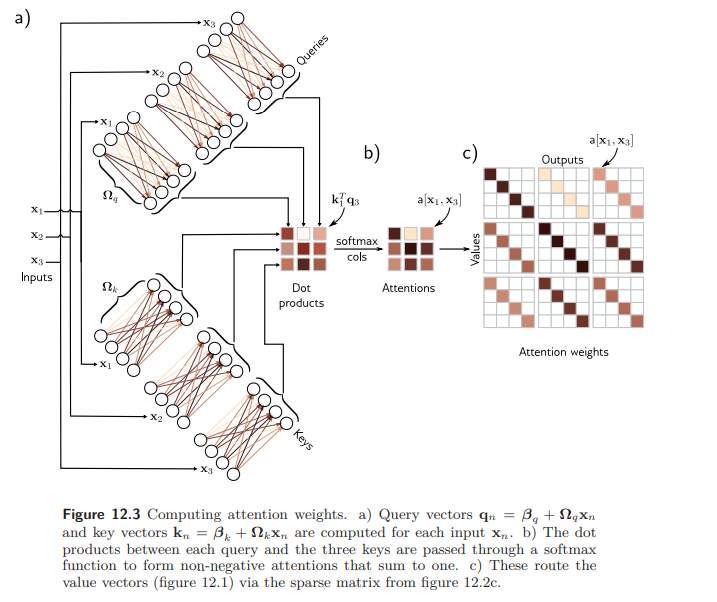

In [ ]:
# Create emptymlist for output
all_x_prime = []

# For each output
for n in range(N):
  # Create list for dot products of query N with all keys
  all_km_qn = []
  # Compute the dot products
  for key in all_keys:
    # TODO -- compute the appropriate dot product
    # Replace this line

    km_qn = np.dot(all_queries[n], key.transpose())
    all_km_qn.append(km_qn)

  # Compute dot product
  attention = softmax(all_km_qn)
  # Print result (should be positive sum to one)
  print("Attentions for output ", n)
  print(attention)

  # TODO: Compute a weighted sum of all of the values according to the attention
  # (equation 12.3)

  x_prime = np.sum(np.dot(attention, all_values[n]), axis=0)

  all_x_prime.append(x_prime)


# Print out true values to check you have it correct
print("x_prime_0_calculated:", all_x_prime[0].transpose())
print("x_prime_0_true: [[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]")
print("x_prime_1_calculated:", all_x_prime[1].transpose())
print("x_prime_1_true: [[ 1.64201168 -0.08470004  4.02764044  2.18690791]]")
print("x_prime_2_calculated:", all_x_prime[2].transpose())
print("x_prime_2_true: [[ 1.61949281 -0.06641533  3.96863308  2.15858316]]")


Attentions for output  0
[[[7.82634214e-11 6.20112256e-03 6.85298014e-11 3.02998626e-10]
  [4.17569079e-02 2.25488145e-12 4.96254361e-02 7.18712028e-03]
  [8.27761736e-13 8.49857660e-01 6.76387413e-13 6.48432771e-12]
  [4.45589049e-05 3.69342732e-09 4.77241756e-05 2.21393947e-05]]

 [[1.09746691e-06 1.01668776e-06 5.21451866e-07 3.00046433e-06]
  [1.69965430e-07 1.87724722e-07 4.47147555e-07 4.59810267e-08]
  [1.67404036e-06 1.49030331e-06 5.39918356e-07 7.72643545e-06]
  [3.20770170e-07 3.33695982e-07 4.71178277e-07 1.90762652e-07]]

 [[2.38968244e-05 8.86669596e-04 2.17862481e-07 7.99792193e-07]
  [3.09879797e-09 2.82579029e-11 1.39041721e-06 2.56437834e-07]
  [1.81263813e-04 4.41412243e-02 1.43204044e-07 1.03468364e-06]
  [6.52908888e-08 1.00903244e-08 7.39669265e-07 3.77744649e-07]]]
Attentions for output  1
[[[3.31237783e-13 9.54541438e-01 2.68631597e-13 2.80193537e-12]
  [8.23626736e-08 1.39283367e-06 8.06792984e-08 1.01657103e-07]
  [2.50966008e-10 7.33400783e-04 2.25113187e-10 

Now let's compute the same thing, but using matrix calculations.  We'll store the $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ in the columns of a $D\times N$ matrix, using equations 12.6 and 12.7/8.

Note:  The book uses column vectors (for compatibility with the rest of the text), but in the wider literature it is more normal to store the inputs in the rows of a matrix;  in this case, the computation is the same, but all the matrices are transposed and the operations proceed in the reverse order.

In [ ]:
# Define softmax operation that works independently on each column
def softmax_cols(data_in):
  # Exponentiate all of the values
  exp_values = np.exp(data_in) ;
  # Sum over columns
  denom = np.sum(exp_values, axis = 0);
  # Replicate denominator to N rows
  denom = np.matmul(np.ones((data_in.shape[0],1)), denom[np.newaxis,:])
  # Compute softmax
  softmax = exp_values / denom
  # return the answer
  return softmax

In [ ]:
 # Now let's compute self attention in matrix form
def self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k):

  # TODO -- Write this function
  # 1. Compute queries, keys, and values
  # 2. Compute dot products
  # 3. Apply softmax to calculate attentions
  # 4. Weight values by attentions
  # Replace this line
  X_prime = np.zeros_like(X);


  return X_prime

In [ ]:
# Copy data into matrix
X = np.zeros((D, N))
X[:,0] = np.squeeze(all_x[0])
X[:,1] = np.squeeze(all_x[1])
X[:,2] = np.squeeze(all_x[2])

# Run the self attention mechanism
X_prime = self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)

# Print out the results
print(X_prime)

If you did this correctly, the values should be the same as above.

TODO:  

Print out the attention matrix
You will see that the values are quite extreme (one is very close to one and the others are very close to zero.  Now we'll fix this problem by using scaled dot-product attention.

In [ ]:
# Now let's compute self attention in matrix form
def scaled_dot_product_self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k):

  # TODO -- Write this function
  # 1. Compute queries, keys, and values
  # 2. Compute dot products
  # 3. Scale the dot products as in equation 12.9
  # 4. Apply softmax to calculate attentions
  # 5. Weight values by attentions
  # Replace this line
  X_prime = np.zeros_like(X);

  return X_prime

In [ ]:
# Run the self attention mechanism
X_prime = scaled_dot_product_self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)

# Print out the results
print(X_prime)

TODO -- Investigate whether the self-attention mechanism is covariant with respect to permutation.
If it is, when we permute the columns of the input matrix $\mathbf{X}$, the columns of the output matrix $\mathbf{X}'$ will also be permuted.
